<a href="https://colab.research.google.com/github/PoPuGaLiC/Coursework-Traffic-control/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорт библиотек**

In [13]:
!pip install apyori

In [14]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns  import  apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# **Используемые функции**

In [15]:
def apyori_fun(dataset, min_thresholds):
  result = []
  times = []
  result_0 = apriori(dataset, min_support = 0.001, use_colnames  =  True)
  for i in range(len(min_thresholds)):
    time_1 = time.time()
    result.append(association_rules(result_0, metric = "confidence", min_threshold = min_thresholds[i]))
    time_2 = time.time()
    times.append(time_2 - time_1)
  return result, times

In [16]:
def results(result, min_thresholds):
  for i in range(len(result)):
    print(min_thresholds[i])
    print("<---->")
    for j in range(len(result[i])):
      print("{} -> {}: {}".format(set(result[i]['antecedents'][j]), set(result[i]['consequents'][j]), round(result[i]['confidence'][j], 4)))
    print("<---->")

In [17]:
def chart(result, min_thresholds, times):
  
  support = []
  for i in min_thresholds:
    support.append(str(i))

  quantity = []
  for i in range(len(result)):
    quantity.append(len(result[i]))

  plt.bar(support, times)
  plt.xlabel("Значение достоверности")
  plt.ylabel("Время работы")
  plt.show()

  plt.bar(support, quantity)
  plt.xlabel("Значение достоверности")
  plt.ylabel("Количество наборов")
  plt.show()

# **Подключение датасетов**

In [18]:
data = pd.read_csv('Market_Basket_Optimisation.csv',encoding = "ISO-8859-1", header = None)
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])


encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
dataset = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)



In [22]:
min_thresholds = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

# **Результаты**

0.7
<---->
{'bacon', 'pancakes'} -> {'spaghetti'}: 0.8125
{'chocolate', 'barbecue sauce'} -> {'mineral water'}: 0.7692
{'turkey', 'black tea'} -> {'eggs'}: 0.7333
{'black tea', 'frozen smoothie'} -> {'milk'}: 0.8182
{'salmon', 'black tea'} -> {'mineral water'}: 0.8
{'eggs', 'blueberries'} -> {'mineral water'}: 0.75
{'pancakes', 'blueberries'} -> {'mineral water'}: 0.7273
{'rice', 'burgers'} -> {'mineral water'}: 0.7273
{'cake', 'white wine'} -> {'spaghetti'}: 0.7273
{'champagne', 'soup'} -> {'mineral water'}: 0.7143
{'chicken', 'protein bar'} -> {'spaghetti'}: 0.8182
{'red wine', 'tomato sauce'} -> {'chocolate'}: 0.8
{'cooking oil', 'fromage blanc'} -> {'mineral water'}: 0.8182
{'whole wheat pasta', 'cooking oil'} -> {'mineral water'}: 0.7059
{'red wine', 'cooking oil'} -> {'spaghetti'}: 0.7059
{'cottage cheese', 'french wine'} -> {'spaghetti'}: 0.7273
{'tomato sauce', 'eggs'} -> {'mineral water'}: 0.7
{'energy drink', 'grated cheese'} -> {'spaghetti'}: 0.7273
{'mushroom cream sauce', 

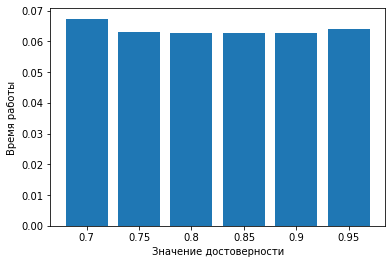

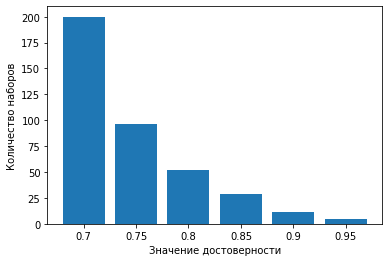

In [26]:
result, times = apyori_fun(dataset, min_thresholds)
results(result, min_thresholds)
chart(result, min_thresholds, times)